
#MENTORÍA 07
#**Cambio climático y ML: cómo mitigar las emisiones de CO2 mediante la reducción del consumo energético en construcciones edilicias**

**TP N°1: Análisis y visualización**

Fecha de entrega: **viernes 1 de julio**

##Consignas generales
Les propongo la elaboración de un informe que deberá apuntar a un público técnico, pero sin conocimientos específicos en el tema. Añadir gráficos y conclusiones obtenidas durante el desarrollo del práctico.


Algunas recomendaciones:
- Utilizar celdas de texto, que servirán para fundamentar sus decisiones, intercaladas con celdas de código, donde verterán el código implementado. No se recomienda utilizar comillas entre el código para explicar las tomas de decisión.
- En la primera celda de código deberían importar todas las librerías que van a utilizar en todo el trabajo práctico.
- Es super recomendable segmentar el trabajo en tópicos o tareas.




## Análisis descriptivo

Entender qué tipos de features poseen los dataset, qué significan y cómo se relacionan entre ellos.
- ¿Cuántos datos tiene mi data set?
- ¿Cuántas features tengo? ¿De qué tipo son?
- ¿A cuáles les deberé aplicar alguna transformación?  
- ¿Cuál es mi variable target? ¿Qué significa?
- ¿Todas las features aportan información diferente?
- ¿Existen datos faltantes? ¿Qué me convendrá hacer con ellos?

##Análisis estadístico

Seleccionar algunos features que crean relevantes para el problema. Utilizar los gráficos y cálculos que le parezcan más apropiados para llegar a las conclusiones.

- ¿Qué herramienta/s es/son la/s más adecuada/s para seleccionar features de interés? ¿Cuál es el criterio para realizar dicha selección?
Analisis de correlacion entre variables
- ¿Existen outliers para estos features?
- ¿Hay valores faltantes?
- ¿Hay valores que no corresponden?
- ¿Que decisión tomarían para completar o eliminar estos outliers y faltantes?
- ¿Cómo es la distribución de las variables en el dataset?
- ¿Existe correlación entre algunas de las variables?

In [1]:
# Importamos librerias a utilizar

### para trabajar con el data set .zip de manera remota
import requests
import zipfile
import io
##########
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# para estandarizar
from sklearn.preprocessing import RobustScaler
# para imputar
from sklearn.impute import KNNImputer

In [2]:
#Llamamos a los datos del github para ver de que tratan
url = 'https://raw.githubusercontent.com/lupepena/Cambio-climatico-y-ML/main/archivo_reducido.csv'
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                10000 non-null  int64  
 1   State_Factor               10000 non-null  object 
 2   building_class             10000 non-null  object 
 3   facility_type              10000 non-null  object 
 4   floor_area                 10000 non-null  float64
 5   year_built                 9025 non-null   float64
 6   energy_star_rating         7021 non-null   float64
 7   ELEVATION                  10000 non-null  float64
 8   january_min_temp           10000 non-null  int64  
 9   january_avg_temp           10000 non-null  float64
 10  january_max_temp           10000 non-null  int64  
 11  february_min_temp          10000 non-null  int64  
 12  february_avg_temp          10000 non-null  float64
 13  february_max_temp          10000 non-null  int6

In [4]:
# Llamamos al data set completo desde github
url = 'https://github.com/lupepena/Cambio-climatico-y-ML/raw/main/data.zip'
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Lista los archivos en el zip
print(zip_file.namelist())

# Lee un archivo CSV dentro del zip sin descomprimir todo el archivo
with zip_file.open('data.csv') as file:
   df_completo = pd.read_csv(file)

['data.csv']


In [5]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

## Análisis descriptivo

Entender qué tipos de features poseen los dataset, qué significan y cómo se relacionan entre ellos.
- ¿Cuántos datos tiene mi data set?
- ¿Cuántas features tengo? ¿De qué tipo son?
- ¿A cuáles les deberé aplicar alguna transformación?
A medida que avancemos en el trabajo práctico veremos que transformaciones y en cuales variables seria necesario.
- ¿Cuál es mi variable target? ¿Qué significa?
- ¿Todas las features aportan información diferente?
- ¿Existen datos faltantes? ¿Qué me convendrá hacer con ellos?

In [6]:
#Vemos info del dataset
Num_fila = df_completo.shape[0]
Num_columna = df_completo.shape[1]
Total_datos = Num_fila*Num_columna
print ("Total de datos en el data set:", Total_datos)

Total de datos en el data set: 4848448


In [7]:
df_completo

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,132.918411,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,39.483672,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,48.404398,75754
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,592.022750,75755


**Información del data set COMPLETO**

Total de columnas: 64

Total de filas: 75757

Total de datos en el data set: 4848448.

Nos interesa saber las variables independientes (features) de nuestro data set. Recordemos que nos interesa predecir el consumo energético de las edificaciones en funcion de esos features.

Nuestra variable objetivo (target): site_eui (Energy use intensity (EUI) is an indicator of the energy efficiency of a building's design and/or operations.)


In [8]:
# columnas data set
df_completo.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [9]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

Tenemos un total de 64 variables, de las cuales una de ella es nuestra variable objetivo (target).
De las 63 variables restantes, hay algunas que a simple vista no serán útiles como variables independientes para entrenar el modelo de predicción, como por ejemplo el id.
Nuestra variable objetivo es site_eui, donde EUI es la sigla de Energy use intensity, un indicador de la eficiencia energética y/o el funcionamiento del edificio.

Las variables son de diferente tipo, habiendo un total de 24 variables float64, 37 variables de tipo int64 y 3 variables objeto.

Con respecto a la información que pueden brindar cada variable, segun las definiciones del diccionario, consideramos    que algunas variables pueden brindarnos la misma información o podrían calcularse/estimarse unas en función de otras:

- snowfall_inches: nos brinda información de la caída de nieve anual.
- snowdepth_inches: nos brinda la profundidad de nieve anual.

Consideramos que ambas nos brindan la misma información: qué tanto nevó en una dada ubicación en un año.

- mes_avg_temp: temperatura promedio en un determinado mes (hay varias columnas)
- avg_temp: promedio de temperatura anual

Consideramos que a partir de la mensual podemos estimar la anual porlo que avg_temp puede no ser necesaria.

Deberiamos corroborar, antes de eliminar una columna, que nos esta brindando información similar.

In [10]:
# Calcular el número de valores faltantes por columna
valores_faltantes = df_completo.isnull().sum()

# Filtrar las columnas que tienen al menos un valor faltante
columnas_con_faltantes = valores_faltantes[valores_faltantes > 0]

print(columnas_con_faltantes)

year_built                    1837
energy_star_rating           26709
direction_max_wind_speed     41082
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
dtype: int64


Hay sólo 6 columnas con datos faltantes:

- year_built                    1837
- energy_star_rating           26709
- direction_max_wind_speed     41082
- direction_peak_wind_speed    41811
- max_wind_speed               41082
- days_with_fog                45796

Deberiamos revisar si los datos faltantes son imputables con la información que nos brindan el resto de variables, ejemplo:
lo relacionado al viento depende de la ubicación y la columna state_factor es una variable directa de la ubicación del edificio.

In [11]:
df_completo.sample(5)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
28327,3,State_6,Commercial,Office_Uncategorized,257439.0,1927.0,87.0,15.2,11,35.080645,...,75,11,0,0,NaN,NaN,NaN,NaN,48.691853,28327
41349,4,State_6,Residential,Multifamily_Uncategorized,53400.0,1929.0,36.0,42.7,4,28.596774,...,75,4,0,0,1.0,1.0,1.0,NaN,113.699452,41349
28192,3,State_6,Residential,Multifamily_Uncategorized,315001.0,1964.0,NaN,15.2,11,35.080645,...,75,11,0,0,NaN,NaN,NaN,NaN,118.865985,28192
32930,3,State_6,Residential,Multifamily_Uncategorized,118668.0,1931.0,NaN,11.9,11,35.080645,...,75,11,0,0,NaN,NaN,NaN,NaN,82.095861,32930
38154,4,State_6,Commercial,Lodging_Hotel,71500.0,2009.0,67.0,42.7,4,28.596774,...,75,4,0,0,1.0,1.0,1.0,NaN,83.248565,38154


# Arrancamos a ver la distribución de nuestros datos

In [12]:
df_completo.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [13]:
# Definimos 2 conjuntos segun variables numéricas y categóricas:
SampleColumns_obj = ["State_Factor", "building_class", "facility_type"]

SampleColumns_num = ['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog',
       'site_eui', 'id']


In [14]:
# Observamos cuantas respuestas distintas hay por cada variable (feature)
df_completo.nunique()

Year_Factor                      6
State_Factor                     7
building_class                   2
facility_type                   60
floor_area                   20433
                             ...  
direction_peak_wind_speed        8
max_wind_speed                  16
days_with_fog                   42
site_eui                     61080
id                           75757
Length: 64, dtype: int64

Realizamos histogramas de las variables categóricas para observar la frecuencia de cada valor.

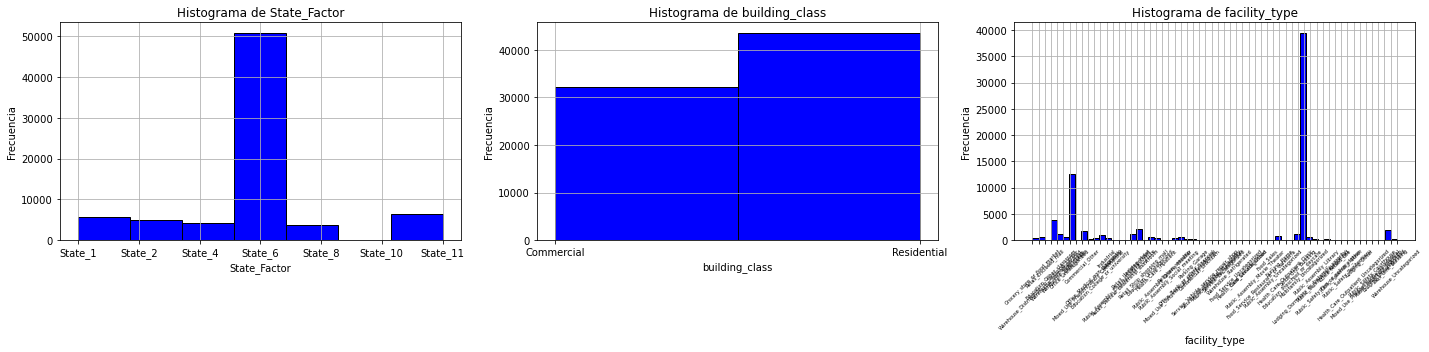

In [15]:
#Veamos histogramas de variables categoricas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

for ax, column in zip(axes, SampleColumns_obj):
    num_bins = df_completo[column].nunique()  # Determinar el número de bins basado en valores únicos
    #if column == 'columna_3':  # Ajustar el número de bins específicamente para una columna
        #num_bins = 15  # Aquí especificas el número de bins que quieres para 'columna_3'
    ax.hist(df_completo[column], bins=num_bins, color='blue', edgecolor='black')
    ax.set_title(f'Histograma de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')
    ax.grid(True)

# Ajustar el layout para evitar superposiciones
plt.xticks(rotation = 45, fontsize=5)
plt.tight_layout()
plt.show()

Realizamos histogramas y box plots de las variables numéricas para observar la frecuencia de cada valor y outliers en caso de que hubiera.

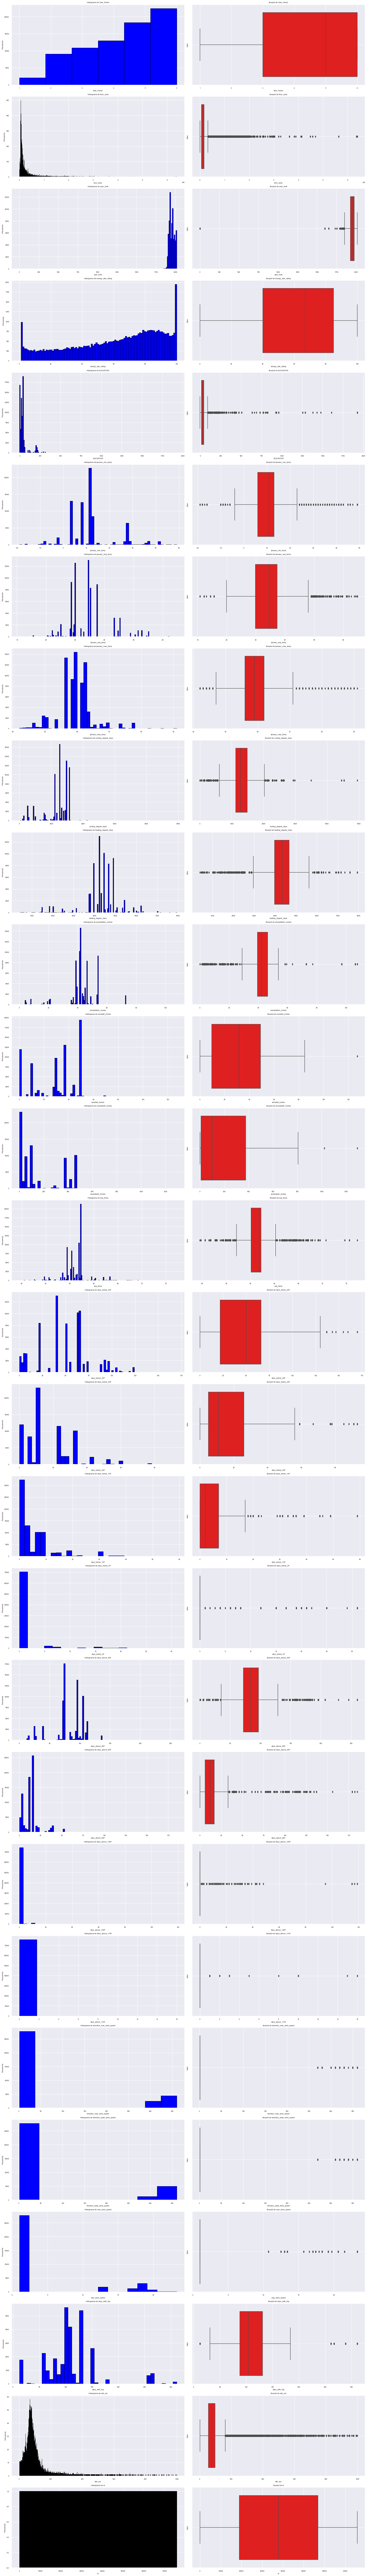

In [17]:
# Configurar el tamaño de la figura y subplots
fig, axes = plt.subplots(nrows=28, ncols=2, figsize=(20, 140))

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Iterar sobre las columnas y los subplots
for i, column in enumerate(SampleColumns_num):
    # Histograma
    ax_hist = axes[i*2]
    num_bins = df_completo[column].nunique()
    ax_hist.hist(df_completo[column], bins=num_bins, color='blue', edgecolor='black')
    ax_hist.set_title(f'Histograma de {column}')
    ax_hist.set_xlabel(column)
    ax_hist.set_ylabel('Frecuencia')
    ax_hist.grid(True)

    # Boxplot
    ax_box = axes[i*2 + 1]
    sns.boxplot(x=df_completo[column], ax=ax_box, color='red')
    ax_box.set_title(f'Boxplot de {column}')
    ax_box.set_xlabel(column)
    ax_box.set_ylabel('Valor')
    ax_box.grid(True)

# Eliminar cualquier subplot vacío si hay columnas impares
if len(SampleColumns_num) % 2 != 0:
    fig.delaxes(axes[-1])

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()

En función de los graficos anteriores vamos a decidir qué variables limpiar:

- Variables categóricas: consideramos que ninguna de estas variables puede ser limpiada a través de herramientas estadísticas.
- Variables númericas, coonsideramos que las siguientes variables no deberian limpiarse:
    - Year_Factor: Año en el que se observaron los factores del clima y el uso de energía. No tiene outliers.
    - Energy_star_rating: Calificación de energía del edificio. Tiene 26709 datos faltantes.
    - Mes_min_temp/mes_max_temp: Minimos y maxímos de temperatura en un mes por ubicacion del edificio. Tiene sentido que haya datos no repetidos, muy alejados de la mediana.
    - Columnas relacionadas con wind: Tiene muchos datos faltantes, no se limpiaran por el momento.
    - days_with_fog: Tiene 45796 datos faltantes, no vamos a limpiarlo.
    - site_eui: es la variable objetivo, por ende no se limpia.
    - id: # identificacion del edificio, no la vamos a tener en cuenta para futuros analisis.

Utilizaremos como criterio de limpieza los cuantiles con Q1 = 0,005 y Q3= 0,995.

In [18]:
#Cambiamos nombre del data frame que vamos a limpiar para guardar siempre el dataframe original
df_limpio = df_completo

# Seleccionamos las columnas a limpiar
columns_to_clean = ['floor_area', 'year_built', 'ELEVATION',
        'january_avg_temp',
       'february_avg_temp',
        'march_avg_temp',
       'april_avg_temp', 'may_avg_temp',
       'june_avg_temp',
       'july_avg_temp',
       'august_avg_temp',
       'september_avg_temp',
       'october_avg_temp',
       'november_avg_temp',
       'december_avg_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F'
       ]

# Definir los cuantiles
low_quantile = 0.005
high_quantile = 0.995

# Calcular los límites inferiores y superiores para las columnas seleccionadas
quantiles = df_limpio[columns_to_clean].quantile([low_quantile, high_quantile])
#print(f"Cuantiles:\n{quantiles}\n")

# Crear una máscara para identificar las filas dentro de los rangos de los cuantiles
mask = np.ones(len(df_limpio), dtype=bool)

for col in columns_to_clean:
    mask = mask & (df_limpio[col] >= quantiles.loc[low_quantile, col]) & (df_limpio[col] <= quantiles.loc[high_quantile, col])
    # Calcular el número de datos eliminados por cada variable
    datos_eliminados = {}
    for col in columns_to_clean:
        fuera_rango = ~((df_limpio[col] >= quantiles.loc[low_quantile, col]) & (df_limpio[col] <= quantiles.loc[high_quantile, col]))
        datos_eliminados[col] = fuera_rango.sum()

# Aplicar la máscara para filtrar el DataFrame
df_filtered = df_limpio[mask]

# Resultados
print(f"\nTamaño original: {df_limpio.shape}")
print(f"\nTamaño filtrado: {df_filtered.shape}")
# Mostrar el número de datos eliminados por cada variable
print("\nDatos eliminados por cada variable:")
for col, num_eliminados in datos_eliminados.items():
    print(f"{col}: {num_eliminados} datos eliminados")


Tamaño original: (75757, 64)

Tamaño filtrado: (71538, 64)

Datos eliminados por cada variable:
floor_area: 758 datos eliminados
year_built: 2302 datos eliminados
ELEVATION: 332 datos eliminados
january_avg_temp: 441 datos eliminados
february_avg_temp: 493 datos eliminados
march_avg_temp: 385 datos eliminados
april_avg_temp: 690 datos eliminados
may_avg_temp: 264 datos eliminados
june_avg_temp: 215 datos eliminados
july_avg_temp: 211 datos eliminados
august_avg_temp: 140 datos eliminados
september_avg_temp: 307 datos eliminados
october_avg_temp: 172 datos eliminados
november_avg_temp: 570 datos eliminados
december_avg_temp: 457 datos eliminados
cooling_degree_days: 345 datos eliminados
heating_degree_days: 567 datos eliminados
precipitation_inches: 178 datos eliminados
snowfall_inches: 344 datos eliminados
snowdepth_inches: 6 datos eliminados
avg_temp: 590 datos eliminados
days_below_30F: 32 datos eliminados
days_below_20F: 236 datos eliminados
days_below_10F: 232 datos eliminados
day

A partir de la limpieza anterior, del total de datos presentes en el dataframe sólo el 5,6% fue eliminado. A continuación observamos la cantidad de datos faltantes por atributo.

In [19]:
# Calcular el número de valores faltantes por columna en el nuevo dataframe limpio: df_filtered
valores_faltantes = df_filtered.isnull().sum()

# Filtrar las columnas que tienen al menos un valor faltante
columnas_con_faltantes = valores_faltantes[valores_faltantes > 0]

print(columnas_con_faltantes)

energy_star_rating           24772
direction_max_wind_speed     38224
direction_peak_wind_speed    38906
max_wind_speed               38224
days_with_fog                43085
dtype: int64


Los únicos atributos que poseen datos faltantes son:
- energy_star_rating           24772
- direction_max_wind_speed     38224
- direction_peak_wind_speed    38906
- max_wind_speed               38224
- days_with_fog                43085

Se puede ver que salvo en el caso de energy_star_rating, el porcentaje de datos faltantes de cada atributo supera el 50%. 

A continuación se grafican nuevamente los histogramas y boxplot de los atributos luego de la limpieza por cuantiles.

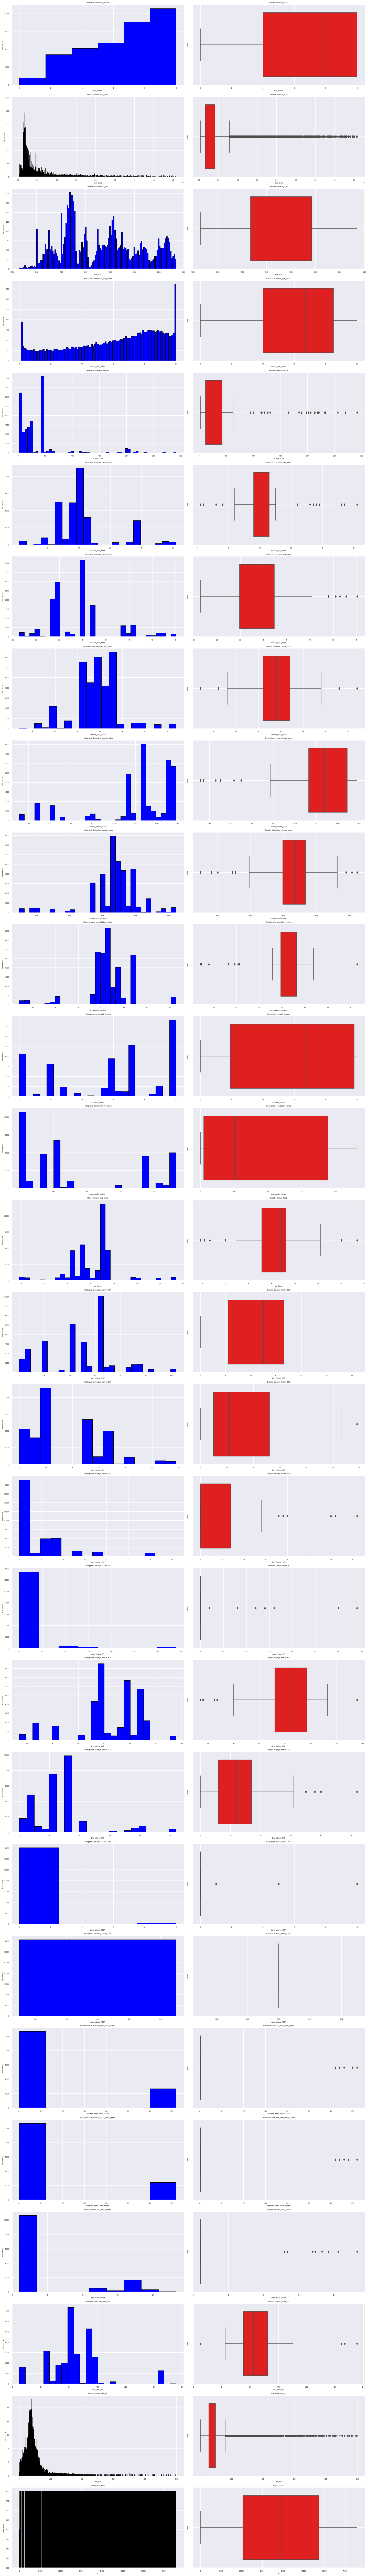

In [20]:
# Configurar el tamaño de la figura y subplots
fig, axes = plt.subplots(nrows=28, ncols=2, figsize=(20, 140))

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Iterar sobre las columnas y los subplots
for i, column in enumerate(SampleColumns_num):
    # Histograma
    ax_hist = axes[i*2]
    num_bins = df_filtered[column].nunique()
    ax_hist.hist(df_filtered[column], bins=num_bins, color='blue', edgecolor='black')
    ax_hist.set_title(f'Histograma de {column}')
    ax_hist.set_xlabel(column)
    ax_hist.set_ylabel('Frecuencia')
    ax_hist.grid(True)

    # Boxplot
    ax_box = axes[i*2 + 1]
    sns.boxplot(x=df_filtered[column], ax=ax_box, color='red')
    ax_box.set_title(f'Boxplot de {column}')
    ax_box.set_xlabel(column)
    ax_box.set_ylabel('Valor')
    ax_box.grid(True)

# Eliminar cualquier subplot vacío si hay columnas impares
if len(SampleColumns_num) % 2 != 0:
    fig.delaxes(axes[-1])

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()

Eliminamos la columna id del data frame ya que no nos sirve para trabajar ni realizar análisis estadístico.

In [21]:
df_filt_2 = df_filtered.drop("id", axis=1)

**Observacion de correlaciones**

Con el fin de observar las relaciones entre variables y entre features y la variable objetivo se elaboró un mapa de calor (heatmap).

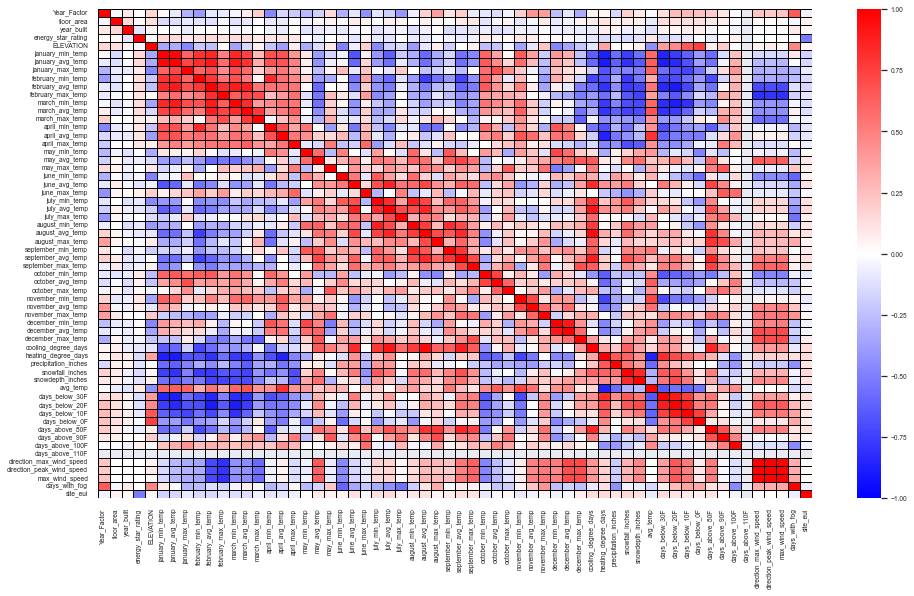

In [47]:
sns.set(font_scale=0.6)

plt.figure(figsize=(16,9))

sns.heatmap(df_filt_2.select_dtypes('number').corr(), cmap="bwr", linewidth = 0.5, linecolor='black', vmin = -1, vmax = 1)
plt.show()

Observaciones a partir de mapa anterior:
- Algo destacable que se observa es que la variable energy_star_rating es la única que tiene una alta correlación (negativa) con la variable objetivo.
- Para cada unos de los meses, se observa una alta correlación entre su temperatura mínima, máxima y promedio. 
- Para los meses de bajas temperaturas vemos una correlación negativa con la cantidad de dias por debajo de 30 F, 20 F y 10 F. De la misma manera los meses de verano tienen una correlación positiva con la cantidad de dias con temperaturas por arriba de los 80 F y 90 F.
- La cantidad de dias que se uso la calefaccion tiene una alta correlacion negativa con la temperatura de los meses de invierno. A su vez, la cantidad de dias que se uso el aire acondicionado tiene una alta correlación postiva con la temperatura de los meses de verano.

A pesar de que se pudieron observar dichas correlaciones, para sacar conclusiones acertivas debemos ver como se comportan las variables entre si con algun tipo de grafico que visualice facilmente el comportamiento entre ellas.

El análisis que pudimos obtener de las correlaciones permitiría reducir el número de features. Los features que tengan alta correlación entyre si pueden ser reducidas a una sola de ellas.


A continuación calculamos las correlaciones entre las features y la variable objetivo con el fin de observar cuales tienen mayor influencia sobre la variable target.

In [48]:
# Definir la columna fija
fixed_column = 'site_eui'

# Definir las columnas variables
variable_columns = ['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F',"energy_star_rating"]

# Calcular las correlaciones
correlations = df_filt_2[variable_columns].corrwith(df_filt_3[fixed_column])

# Mostrar las correlaciones
print(correlations)

Year_Factor            -0.047564
floor_area              0.050861
year_built              0.019894
energy_star_rating     -0.516611
ELEVATION               0.034004
january_min_temp       -0.176679
january_avg_temp       -0.162971
january_max_temp       -0.082405
february_min_temp      -0.142879
february_avg_temp      -0.148851
february_max_temp      -0.099842
march_min_temp         -0.126528
march_avg_temp         -0.128111
march_max_temp         -0.059886
april_min_temp         -0.106699
april_avg_temp         -0.100663
april_max_temp         -0.069717
may_min_temp            0.009219
may_avg_temp            0.088894
may_max_temp            0.054752
june_min_temp           0.049800
june_avg_temp           0.130627
june_max_temp          -0.026227
july_min_temp           0.118858
july_avg_temp           0.143792
july_max_temp           0.055235
august_min_temp         0.100365
august_avg_temp         0.121525
august_max_temp         0.040735
september_min_temp      0.071275
september_

Como ya se habia observado en el heatmap, la variable energy_star_rating presenta la mayor correlación (negativa). Todo el resto de features poseen correlaciones por debajo de 0,18.

**Imputación**

Con el fin de determinar si tiene sentido imputar los datos faltantes se analizaran las correlaciones que tienen las variables con datos faltantes con el target.

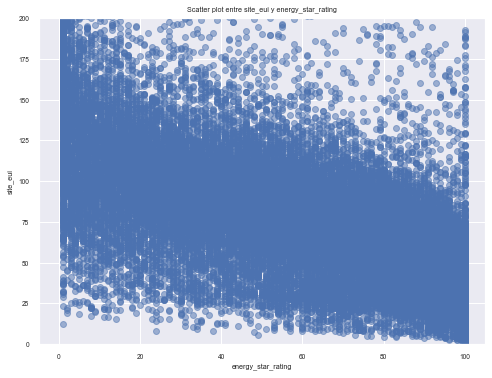

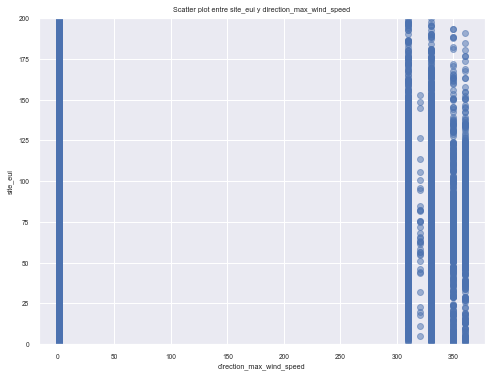

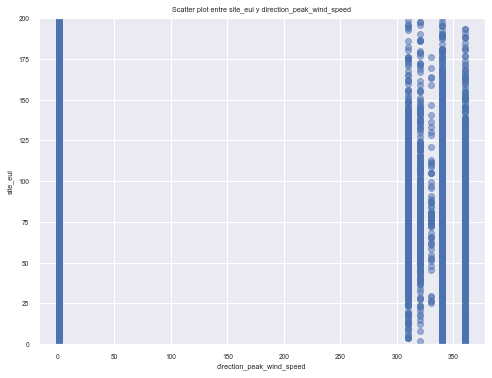

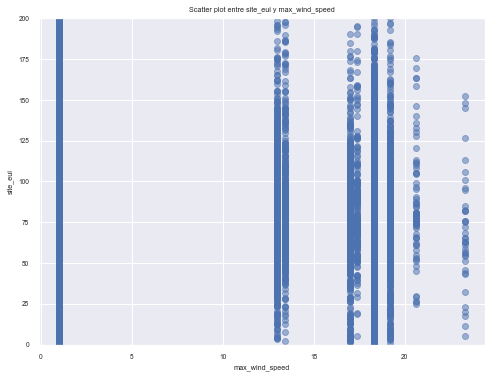

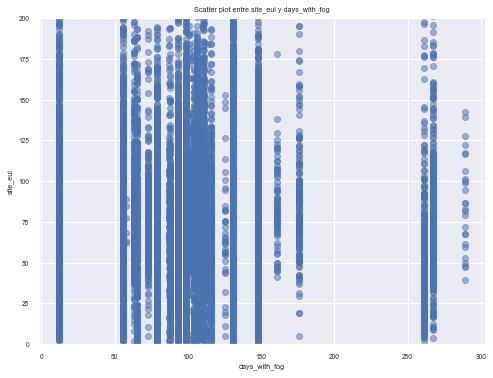

In [52]:
# Columna fija
fixed_column = 'site_eui'
# Lista de columnas seleccionadas
selected_columns = ['energy_star_rating', 'direction_max_wind_speed', 'direction_peak_wind_speed',"max_wind_speed","days_with_fog"]  # Lista de columnas seleccionadas

# Iterar sobre las columnas seleccionadas y hacer un scatter plot
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_filt_2[column], df_filt_2[fixed_column], alpha=0.5)
    plt.title(f'Scatter plot entre {fixed_column} y {column}')
    plt.ylim(0,200) #para poder visualizar la tendencia
    plt.xlabel(column)
    plt.ylabel(fixed_column)
    plt.grid(True)
    plt.show()

En función de los gráficos anteriores decidimos que la columna "energy_star_rating" debe ser una variable imputada ya que muestra una correlación al graficar versus la variable target. Por otro lado, las variables 'direction_max_wind_speed', 'direction_peak_wind_speed',"max_wind_speed","days_with_fog" tiene un porcentaje de datos faltantes respecto al total de datos en el data frame filtrado (df_filt_2) de 53%, 54%, 53% y 60%, respectivamente. Al tener porcentajes tan altos de datos faltantes consideramos que no podrian imputarse, "inventariamos" un gran porcentaje de datos. Por esto mismo decidimos sacar del df_fil_2 las columnas relacionadas al viento y niebla.

In [23]:
#Columnas a eliminar
columns_delet = ['direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']
df_filt_3 = df_filt_2.drop(columns=columns_delet)

Con el fin de ver correlación entre la variable que queremos imputar (energy_star_rating) y el resto de las features, graficamos scatter plots para cada feature.

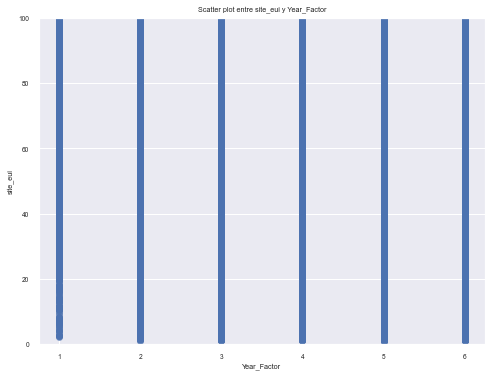

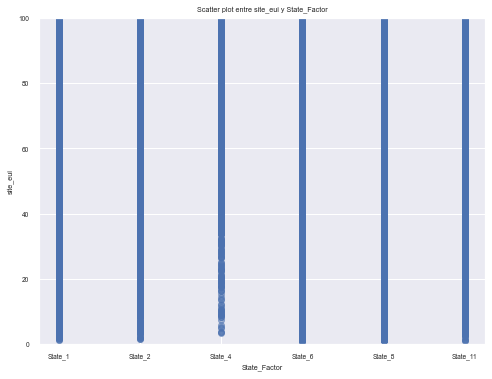

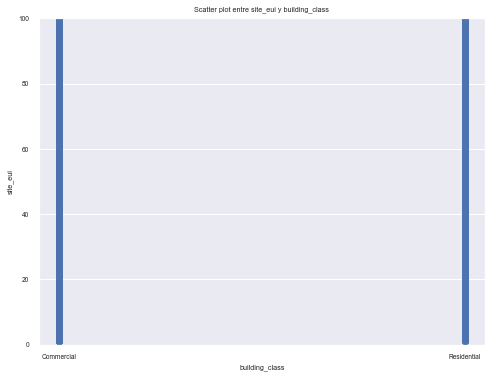

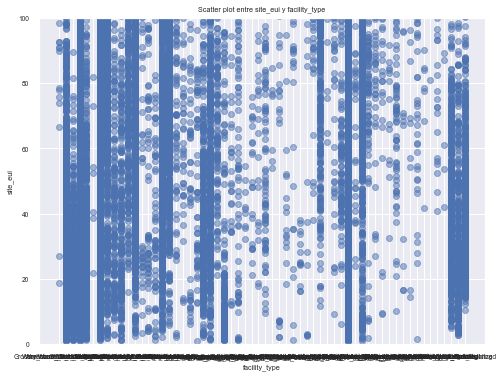

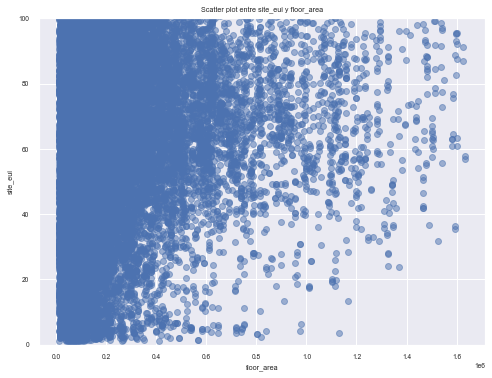

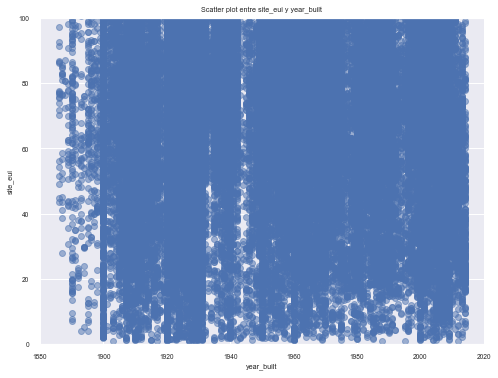

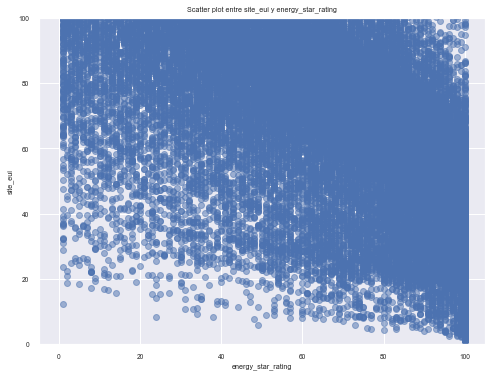

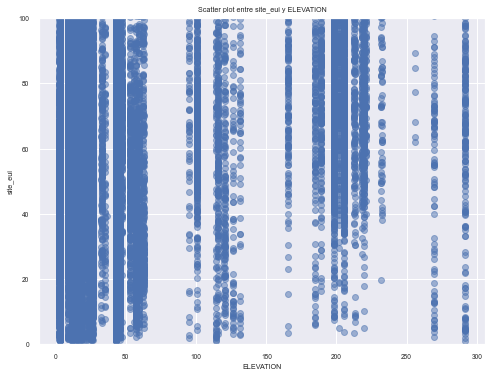

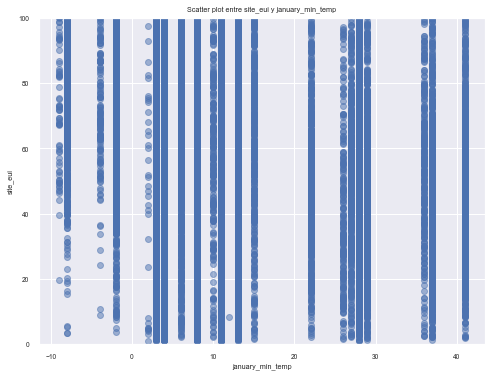

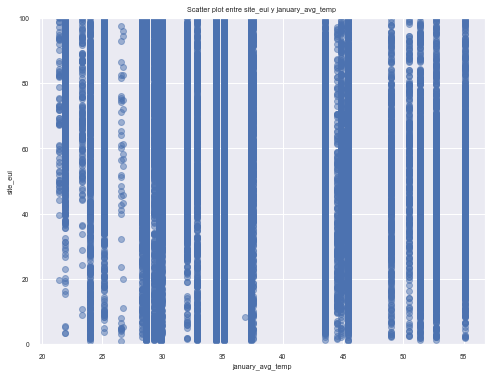

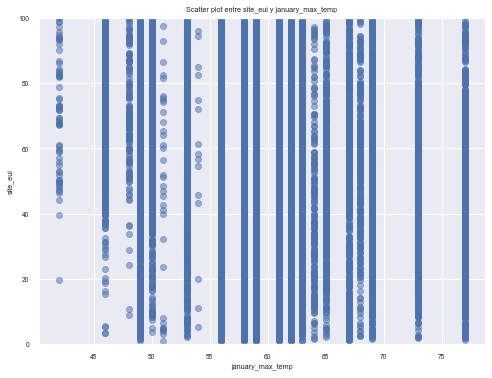

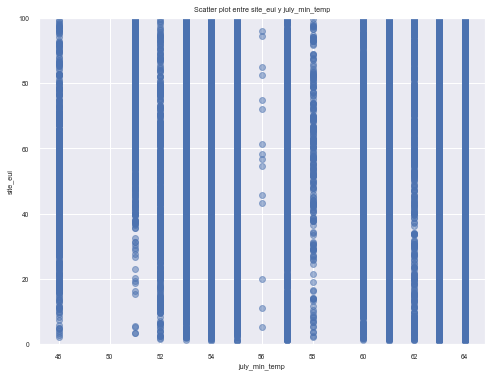

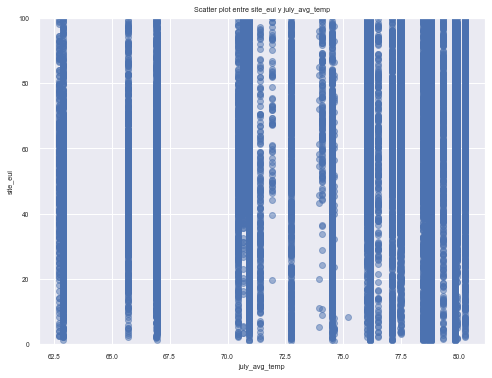

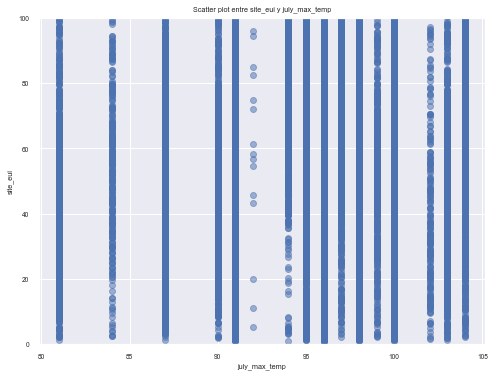

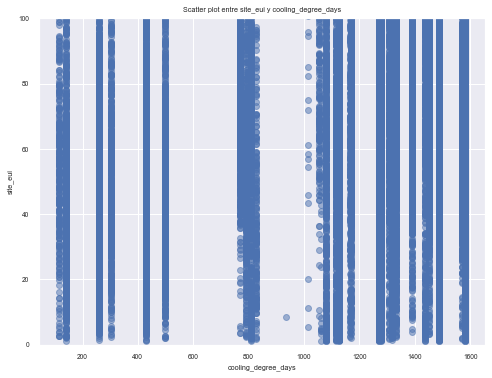

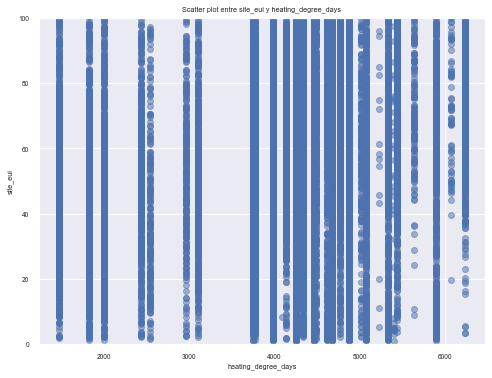

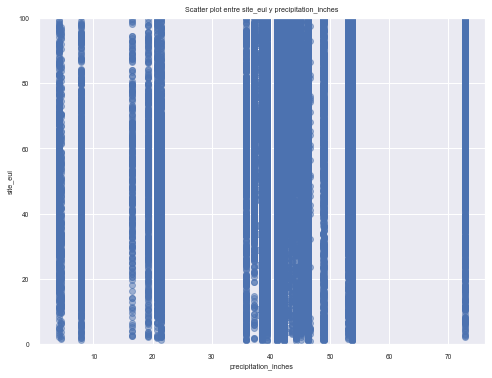

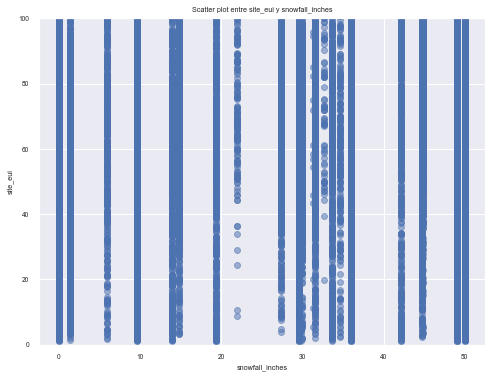

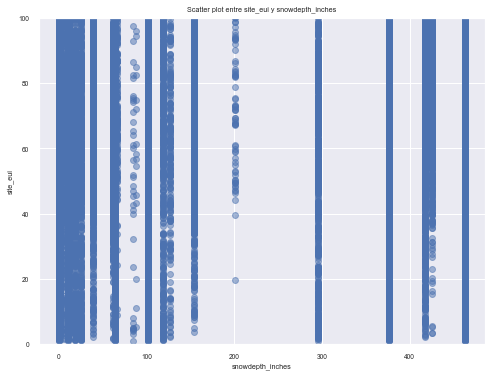

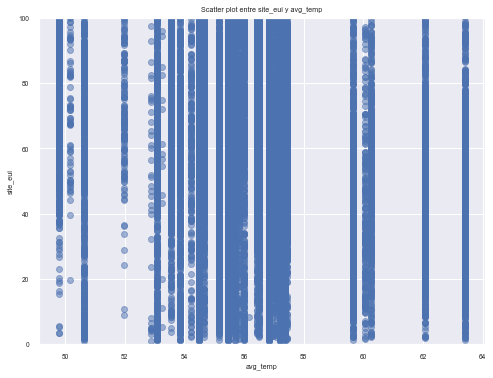

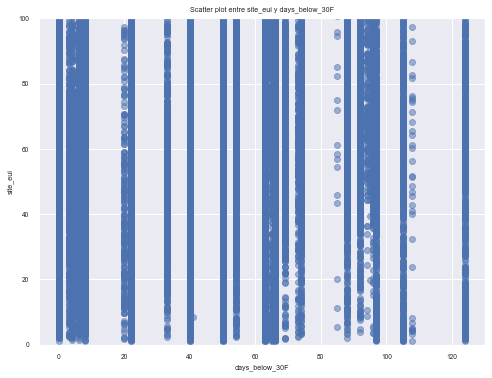

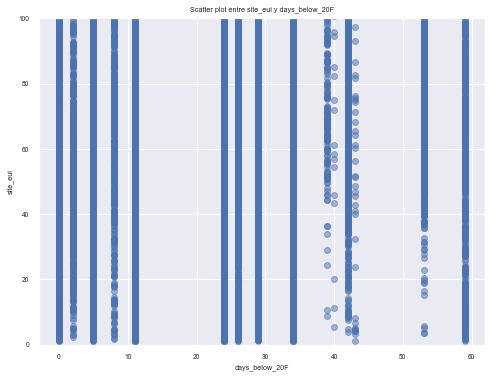

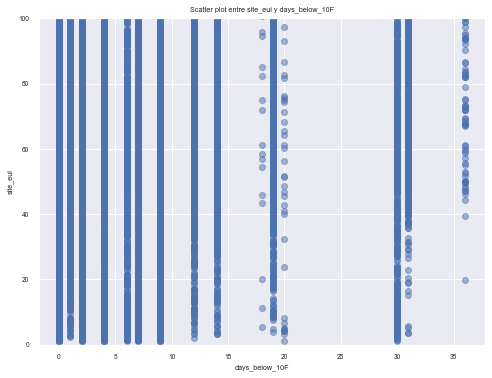

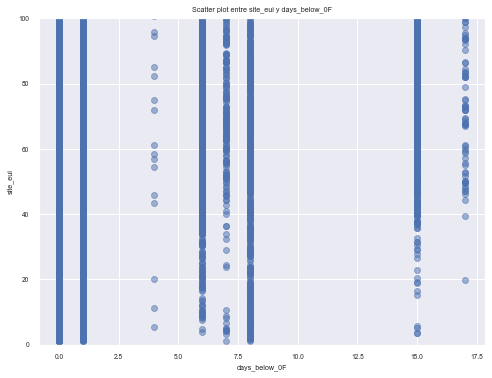

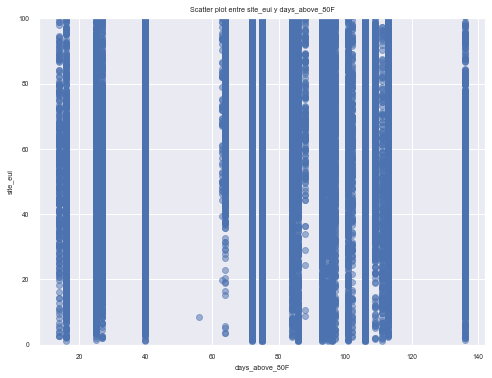

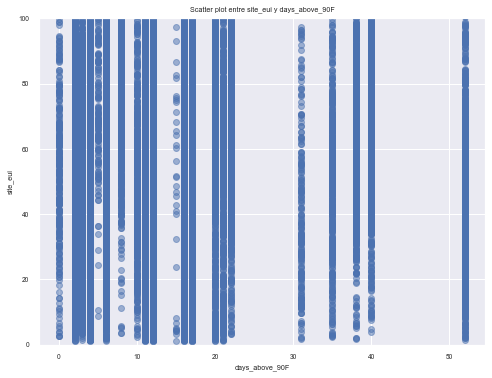

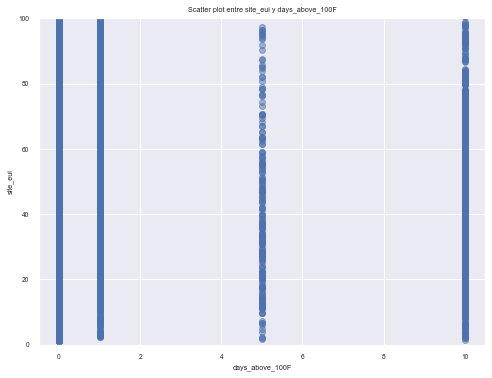

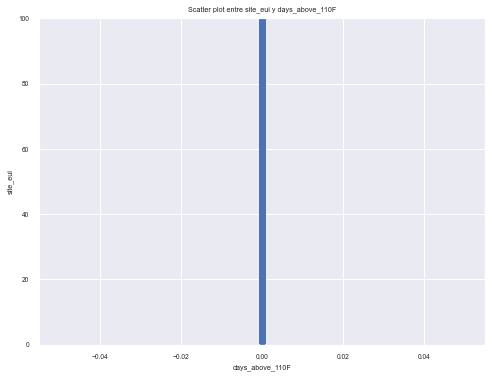

In [25]:
# Columna fija
fixed_column = 'site_eui'
# Lista de columnas seleccionadas
selected_columns = ['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp', 'july_min_temp', 'july_avg_temp', 'july_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F']
# Iterar sobre las columnas seleccionadas y hacer un scatter plot
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_filt_2[column], df_filt_2[fixed_column], alpha=0.5)
    plt.title(f'Scatter plot entre {fixed_column} y {column}')
    plt.ylim(0,100)
    plt.xlabel(column)
    plt.ylabel(fixed_column)
    plt.grid(True)
    plt.show()


Calculemos correlaciones entre la variable energy_star_rating con el fin de ver cuales pueden servirnos al momento de imputar. Para esto utilizaremos corrwith que correlaciona variables de tipo númericas.

In [53]:
# Definir la columna fija
fixed_column = 'energy_star_rating'

# Definir las columnas variables
variable_columns = ['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F',"site_eui"]

# Calcular las correlaciones
correlations = df_filt_3[variable_columns].corrwith(df_filt_3[fixed_column])

# Mostrar las correlaciones
print(correlations)

Year_Factor            -0.006178
floor_area              0.037946
year_built             -0.094411
energy_star_rating      1.000000
ELEVATION              -0.026955
january_min_temp        0.152083
january_avg_temp        0.156190
january_max_temp        0.087422
february_min_temp       0.128414
february_avg_temp       0.141309
february_max_temp       0.105124
march_min_temp          0.140066
march_avg_temp          0.140250
march_max_temp          0.078132
april_min_temp          0.108318
april_avg_temp          0.106953
april_max_temp          0.099240
may_min_temp           -0.020703
may_avg_temp           -0.071934
may_max_temp            0.003577
june_min_temp          -0.037676
june_avg_temp          -0.104980
june_max_temp           0.057114
july_min_temp          -0.093375
july_avg_temp          -0.105718
july_max_temp          -0.003203
august_min_temp        -0.080120
august_avg_temp        -0.092815
august_max_temp        -0.025807
september_min_temp     -0.046543
september_

De los datos obtenidos observamos que no hay relaciones lineales con la variable que queremos imputar pero lo haremos igual, ya que el método de imputación no se basa en relaciones lineales. 

**Estandarización**

Como tenemos variables con escalas muy distintas debemos estandarizarlas (salvo la variable a imputar) previo a imputar: usaremos RobustScaler la cual mantiene la distribución de los datos.

In [28]:
Important_var_col = ['floor_area', 'year_built', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F']


scaler = RobustScaler() #estandarizador que usamos

#Ajustar y transformar
scaled = scaler.fit_transform(df_filt_3[Important_var_col])

#Crear un nuevo DataFrame con los datos transformados
df_scaled = pd.DataFrame(scaled, columns=Important_var_col) #solo variables númericas salvo la variable a imputar

#generamos un data frame con la variable a imputar: en este caso solo energy_star_rating
column_energy_star_rating = ['energy_star_rating']
df_esr = df_filt_3[column_energy_star_rating]

# Agregamos al dataframe estandarizado de variables númericas la variable a imputar
df_escalado = pd.concat([df_scaled, df_esr.reset_index(drop=True)], axis=1) #aca energy_star_rating NO esta imputada


Realizamos un histograma luego de estandarizar las variables para observar que mantengan su distribución.

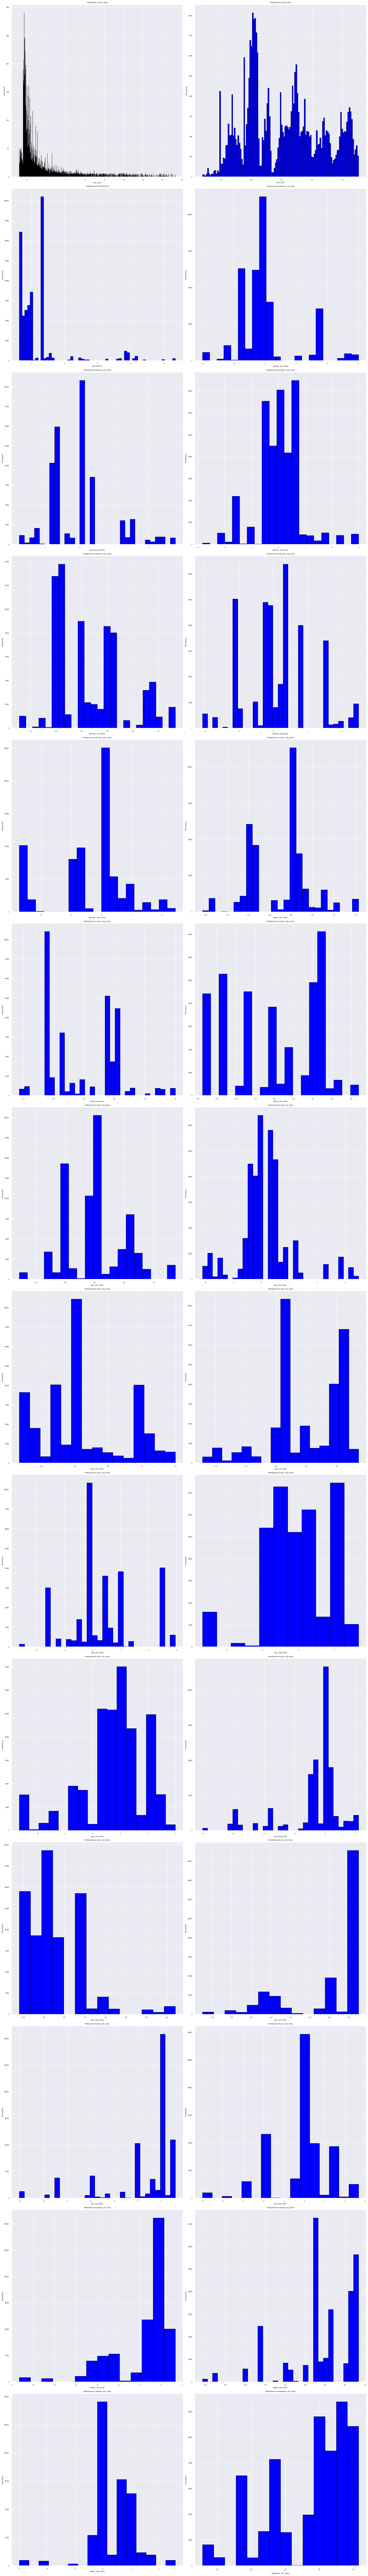

In [30]:
# Veamos histogramas de variables una vez estandarizadas
fig, axes = plt.subplots(nrows=14, ncols=2, figsize=(20, 140))

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

for ax, column in zip(axes, Important_var_col):
    num_bins = df_escalado[column].nunique()  # Determinar el número de bins basado en valores únicos
    ax.hist(df_escalado[column], bins=num_bins, color='blue', edgecolor='black')
    ax.set_title(f'Histograma de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')
    ax.grid(True)

# Ajustar el layout para evitar superposiciones
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**KNNImputer**

Vamos a imputar utilizando KNNImputer, unicamente la columna energy_star_rating.

In [54]:
# Instanciar KNNImputer (con 2 vecinos en este ejemplo)
imputer = KNNImputer(n_neighbors=2)

# Imputar valores faltantes en 'column_to_impute'
df_imputed = pd.DataFrame(imputer.fit_transform(df_escalado), columns=df_escalado.columns)


Generamos el histograma con y sin imputación de la variable energy_star_rating para ver si se mantuvo la forma de su distribución.

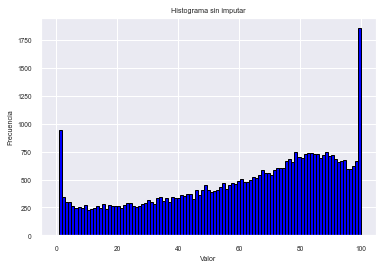

In [57]:
num_bins = df_filt_3['energy_star_rating'].nunique()
# Crear histograma de la columna 'columna'
plt.hist(df_escalado['energy_star_rating'], bins = num_bins, color='blue', edgecolor='black')

# Personalizar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma sin imputar')

# Mostrar el histograma
plt.show()

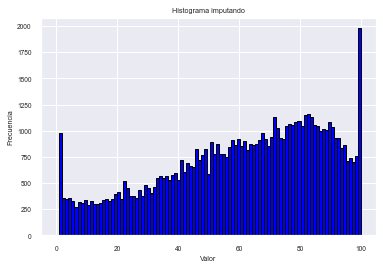

In [58]:
# Crear histograma de la columna 'columna'
plt.hist(df_imputed['energy_star_rating'], bins = num_bins, color='blue', edgecolor='black')

# Personalizar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma imputando')

# Mostrar el histograma
plt.show()

Escaleamos la variable ya imputada y la unimos al data frame con variables escaladas (df_escalado).

In [34]:
#Ajustar y transformar
esr_column = ['energy_star_rating']
scaled = scaler.fit_transform(df_imputed[esr_column])

#Crear un nuevo DataFrame con los datos transformados
df_esr_scaled = pd.DataFrame(scaled, columns=esr_column)

In [36]:
#borramos del imputed la esr sin escalar
df_SinESR = df_imputed.drop(columns = ['energy_star_rating'])

#concatenamos la columna esr escalada
df_EscESR = pd.concat([df_SinESR, df_esr_scaled.reset_index(drop=True)], axis=1) #dataframe escaleado incluyendo ESR

In [38]:

#concatenamos con las variables categoricas y la varibale objetivo
#generamos el dataframe con las variables númericas estandarizadas y la variable a imputar
column_cat_eui = ['Year_Factor', 'State_Factor', 'building_class', 'facility_type','site_eui']
df_complemento = df_filt_3[column_cat_eui]

# Mantenemos las columnas no numéricas en el DataFrame final
df_filt_4 = pd.concat([df_EscESR, df_complemento.reset_index(drop=True)], axis=1)

**DataFrame Final**

df_filt_4 es el dataframe limpio, escalado y con la variable ESR imputada. También posee las variables categóricas y la variable target.

Aclaración: si quisieramos usar este data frame para entrenar algun modelo es necesario hacer un encoding de las variables categóricas.